In [1]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np
from scipy.signal import find_peaks
import scipy.signal
from astropy import units as u
from astropy.io import ascii
from astropy.table import Table

In [2]:
search_result = lk.search_lightcurve('KIC 5202905', mission='Kepler')
lc_collection = search_result.download_all()

In [3]:
lc = lc_collection.stitch()
total_observation_time = (lc.time[-1] - lc.time[0]).value
delta_f = (1/total_observation_time) 
sampling_rate= np.median(np.diff(lc.time.value))

In [20]:
f_max =  (1/(2*sampling_rate))
f_min = delta_f/3
frequency_grid = np.arange(f_min, f_max, f_min)/(u.day)

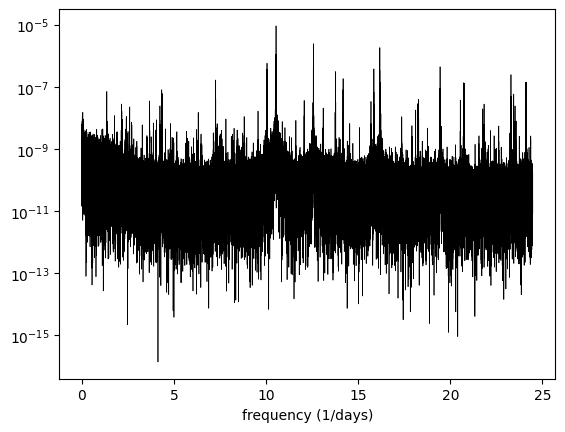

In [25]:
pg = lc.to_periodogram(
    #method='lombscargle',
    normalization='psd',
    frequency=frequency_grid
)

power = pg.power.value
freq = pg.frequency.to(1/u.day).value 
plt.semilogy(freq, power, 'k-',lw = 0.5)
plt.xlabel("frequency (1/days)")
plt.show()

In [22]:
data = Table()
data['time'] = lc.time.value
data['flux'] = lc.flux.value
data['uncertainty'] = lc.flux_err.value
ascii.write(data, 'KIC_5202905.data', overwrite=True, format="csv",
            formats={"time": "{:.10f}", "flux": "{:.10f}", "uncertainty": "{:10f}"})

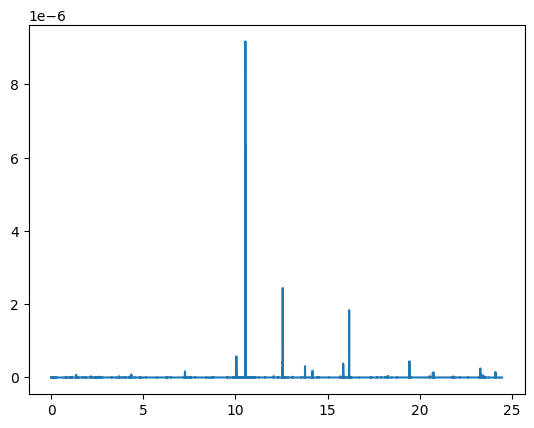

In [23]:
plt.plot(freq, power)